In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
from scipy import special

In [2]:
#Number 2
#Part A
def f(x):
    return (2/np.sqrt(np.pi))*(np.exp(-x**2))

In [3]:
#Part B
def simp(f,a,b,N):
    h = (b-a)/(N-1)
    x=np.linspace(a,b,N)
    w = np.ones(N)
    w[1:-1:2] = 4
    w[2:-1:2] = 2
    S = (h/3)*np.dot(f(x),w)
    return S

In [4]:
def trap(f,a,b,N):
    h = (b-a)/(N-1)
    x=np.linspace(a,b,N)
    w = np.ones(N)
    w[1:-1] = 2
    T = (h/2)*np.dot(f(x),w)
    return T

In [5]:
def transint(x,w,a,b):
    x = (b-a)*(x + (a+b)/(b-a))/2
    w = (b-a)*w/2
    return x,w

In [6]:
def mygauss(N,f,a=-1,b=1):
    x, w = np.polynomial.legendre.leggauss(N)
    xt,wt = transint(x,w,a,b)
    return wt.dot(f(xt))

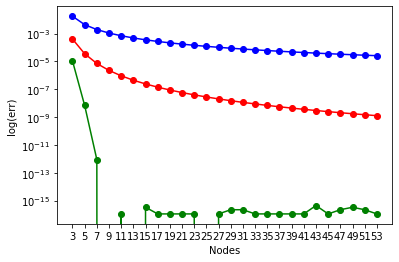

In [7]:
a=0
b=1
errg = []
errt = []
errs = []
Nvec = 2*np.arange(1,27)+1
for N in Nvec:
    G = mygauss(N,f,a,b)
    T = trap(f,a,b,N)
    S = simp(f,a,b,N)
    errg.append(np.fabs(G-np.math.erf(1)))
    errt.append(np.fabs(T-np.math.erf(1)))
    errs.append(np.fabs(S-np.math.erf(1)))
plt.semilogy(Nvec,errg,'go-',Nvec,errt,'bo-',Nvec,errs,'ro-')
plt.xlabel('Nodes')
plt.ylabel('log(err)')
plt.xticks(Nvec);
#This seems expected in terms of the results

In [8]:
#Number 3
#Part A
def g(x):
    return (np.log(1-x))/x

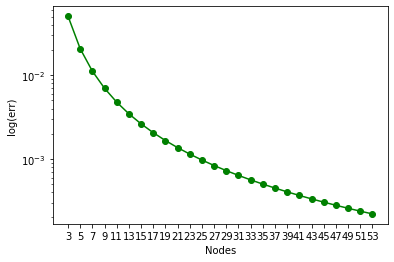

In [9]:
a=0
b=1
errg = []
Nvec = 2*np.arange(1,27)+1
for N in Nvec:
    G = mygauss(N,g,a,b)
    errg.append(np.fabs(G+(np.pi**2)/6))
plt.semilogy(Nvec,errg,'go-')
plt.xlabel('Nodes')
plt.ylabel('log(err)')
plt.xticks(Nvec);


In [10]:
#Part B
def h(x):
    return (np.log(1+x))/x

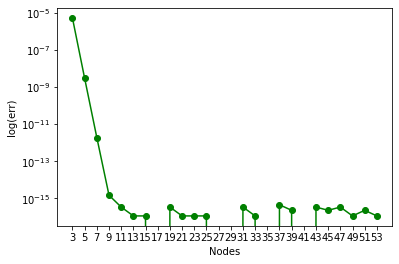

In [11]:
a=0
b=1
errg = []
Nvec = 2*np.arange(1,27)+1
for N in Nvec:
    G = mygauss(N,h,a,b)
    errg.append(np.fabs(G-(np.pi**2)/12))
plt.semilogy(Nvec,errg,'go-')
plt.xlabel('Nodes')
plt.ylabel('log(err)')
plt.xticks(Nvec);

In [12]:
#Part C
def w(x):
    return (np.log(1+x**2))/x

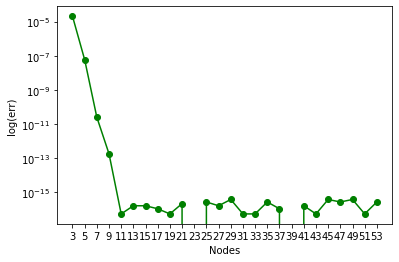

In [13]:
a=0
b=1
errg = []
Nvec = 2*np.arange(1,27)+1
for N in Nvec:
    G = mygauss(N,w,a,b)
    errg.append(np.fabs(G-(np.pi**2)/24))
plt.semilogy(Nvec,errg,'go-')
plt.xlabel('Nodes')
plt.ylabel('log(err)')
plt.xticks(Nvec);